# Raíces de funciones. Ceros de Funciones

In [1]:
%matplotlib inline

from math import ceil, log
import matplotlib.pyplot as plt
from beautifultable import BeautifulTable
import scipy.optimize as opt
import numpy as np
import pandas as pd

## Método de Bisección

In [2]:
def bisection(func, x_a, x_b, error, table):
    if func(x_a) * func(x_b) >= 0:
        raise ValueError("The bisection method cannot be applied")

    # The bisection method
    while x_b - x_a > error:
        # calculate middle point
        x_m = (x_a + x_b) / 2

        table.append([x_a, x_b, x_m, func(x_a), func(x_b), func(x_m), x_b - x_a])

        if func(x_m) == 0:
            return x_m

        if func(x_a) * func(x_m) < 0:
            x_b = x_m
        else:
            x_a = x_m

    table.append([x_a, x_b, (x_a + x_b) / 2, func(x_a), func(x_b), func(x_m), x_b - x_a])

    return (x_a + x_b) / 2

$$f(x) = x^3 + 4 x^2 - 10$$

In [4]:
func = lambda x: x ** 3 + 4 * x ** 2 - 10

### Tiempos

In [6]:
bisection(func, 1, 2, 0.001)  # own function

1.36474609375

In [7]:
opt.bisect(func, 1, 2, xtol=0.001)  # scipy function

1.3642578125

In [9]:
f'Raíz: {bisection(func, 1, 2, 0.001, table:=[])}'

'Raíz: 1.36474609375'

In [6]:
table = np.array(table)

In [7]:
pd.DataFrame(table, columns=['x_a', 'x_b', 'x_m', 'f(x_a)', 'f(x_b)', 'f(x_m)', 'tramo'])

,x_a,x_b,x_m,f(x_a),f(x_b),f(x_m),tramo
0,1.000000,2.000000,1.500000,-5.000000,14.000000,2.375000,1.000000
1,1.000000,1.500000,1.250000,-5.000000,2.375000,-1.796875,0.500000
2,1.250000,1.500000,1.375000,-1.796875,2.375000,0.162109,0.250000
3,1.250000,1.375000,1.312500,-1.796875,0.162109,-0.848389,0.125000
4,1.312500,1.375000,1.343750,-0.848389,0.162109,-0.350983,0.062500
5,1.343750,1.375000,1.359375,-0.350983,0.162109,-0.096409,0.031250
6,1.359375,1.375000,1.367188,-0.096409,0.162109,0.032356,0.015625
7,1.359375,1.367188,1.363281,-0.096409,0.032356,-0.032150,0.007812
8,1.363281,1.367188,1.365234,-0.032150,0.032356,0.000072,0.003906
9,1.363281,1.365234,1.364258,-0.032150,0.000072,-0.016047,0.001953


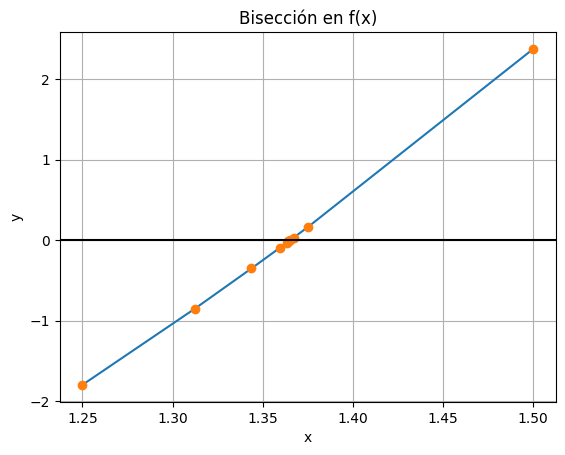

In [8]:
xi = table[:, 2]
yi = table[:, 5]

orden = np.argsort(xi)
xi = xi[orden]
yi = yi[orden]


plt.plot(xi, yi)
plt.plot(xi,yi,'o')
plt.axhline(0, color="black")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Bisección en f(x)')
plt.grid()
plt.show()